In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [4]:
df = yf.download('IBM', 
                      start='2008-01-01', 
                      end='2018-04-01', 
                      progress=False, 
                      interval='1mo'
)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-01,104.196938,104.196938,92.772469,102.399620,65.712219,258909998.0
2008-02-01,102.447418,111.500954,96.175911,108.852776,69.853378,176021717.0
2008-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,108.852776,114.521988,106.883362,110.076485,70.908714,187531272.0
2008-04-01,110.133842,119.502869,108.852776,115.391968,74.332840,200923212.0


In [5]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()

,Close
Date,
2008-01-01,102.399620
2008-02-01,108.852776
2008-02-06,NaN
2008-03-01,110.076485
2008-04-01,115.391968


In [6]:
df.dropna(subset=['Close'],inplace=True)
df.head()

,Close
Date,
2008-01-01,102.399620
2008-02-01,108.852776
2008-03-01,110.076485
2008-04-01,115.391968
2008-05-01,123.738052


In [7]:
df.tail()

,Close
Date,
2017-11-01,147.198853
2017-12-01,146.673035
2018-01-01,156.500961
2018-02-01,148.977051
2018-03-01,146.682602


In [8]:
df.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01'],
              dtype='datetime64[ns]', name='Date', length=123, freq=None)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,123.0,149.388612,30.16306,78.011475,123.532505,153.240921,175.023903,203.919693


<AxesSubplot:xlabel='Date'>

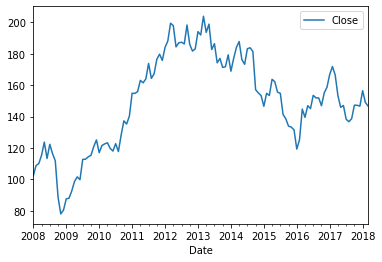

In [10]:
df.plot()

In [11]:
time_series = df['Close']

In [12]:
type(time_series)

pandas.core.series.Series

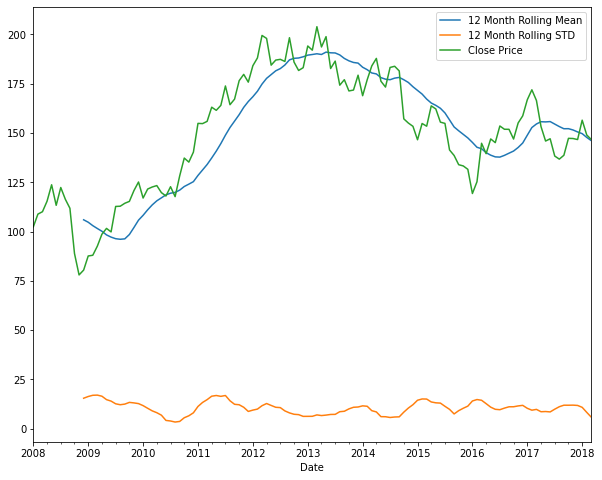

In [14]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(10,8))
time_series.rolling(12).std().plot(label='12 Month Rolling STD')
time_series.plot(label='Close Price')
plt.legend();

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomp = seasonal_decompose(time_series)

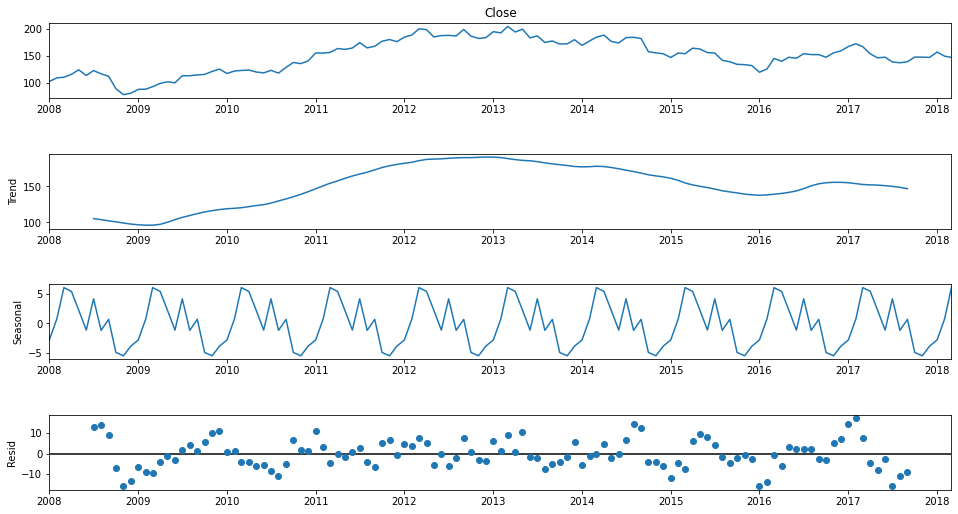

In [17]:
fig=decomp.plot()
fig.set_size_inches(15,8)

In [18]:
df.head()

,Close
Date,
2008-01-01,102.399620
2008-02-01,108.852776
2008-03-01,110.076485
2008-04-01,115.391968
2008-05-01,123.738052


### Dicky Fuller Test
Test if data is stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(df['Close'])

In [21]:
result

(-1.8393461990185158,
 0.3611096669221444,
 0,
 122,
 {'1%': -3.4851223522012855,
  '5%': -2.88553750045158,
  '10%': -2.5795685622144586},
 742.5271623573511)

In [22]:
def adf_check(time_series):
    
    result=adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Obseravtions used']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [23]:
adf_check(df['Close'])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -1.8393461990185158
p-value : 0.3611096669221444
# of lags : 0
Num of Obseravtions used : 122
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [24]:
df['First Difference'] = df['Close'] - df['Close'].shift(1)

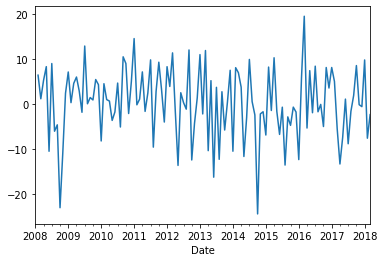

In [25]:
df['First Difference'].plot();

In [26]:
adf_check(df['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -11.521926003013878
p-value : 4.020667090166686e-21
# of lags : 0
Num of Obseravtions used : 121
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


#### The above shows the data is stationary as p-value is < 0.05
The below is just to show in case we need a second difference

In [27]:
df['Seasonal Difference'] = df['Close'] - df['Close'].shift(12)

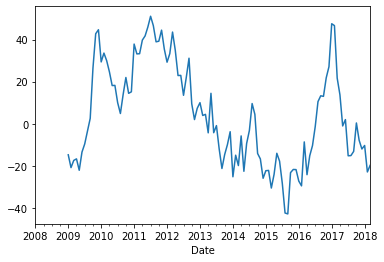

In [28]:
df['Seasonal Difference'].plot();

In [29]:
adf_check(df['Seasonal Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -1.2134576153139525
p-value : 0.6677799595044898
# of lags : 12
Num of Obseravtions used : 98
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [30]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

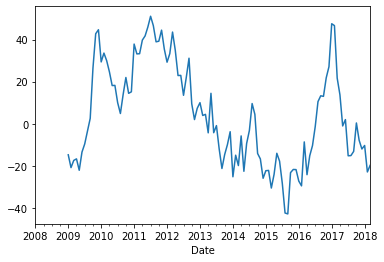

In [31]:
df['Seasonal Difference'].plot();

In [32]:
adf_check(df['Seasonal First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -4.4005769668318795
p-value : 0.00029613550684252313
# of lags : 11
Num of Obseravtions used : 98
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

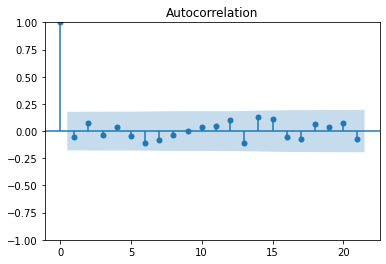

In [34]:
fig_first = plot_acf(df['First Difference'].dropna())

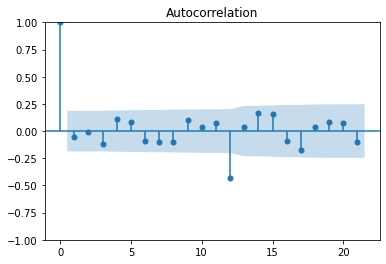

In [35]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


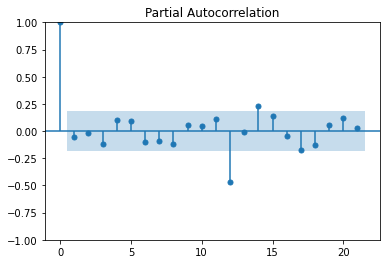

In [36]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


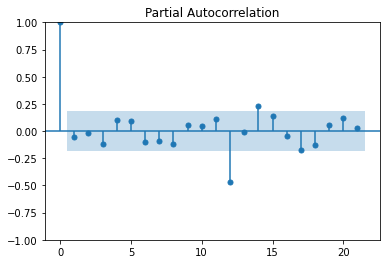

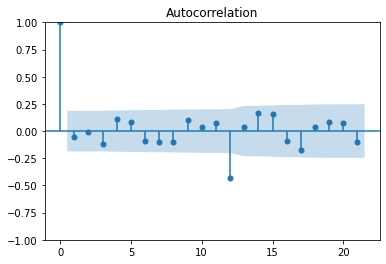

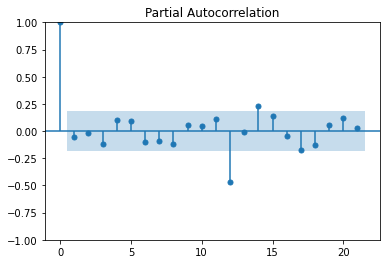

In [37]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(*args, **kwargs)
 |  
 |  ARIMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Method resolution order:
 |      ARIMA
 |      ARMA
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ARMA:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [40]:
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [41]:
results = model.fit()

In [42]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  123
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -387.599
Date:                              Tue, 19 Apr 2022   AIC                            781.199
Time:                                      17:59:50   BIC                            789.300
Sample:                                  01-01-2008   HQIC                           784.485
                                       - 03-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0163      0.132      0.124      0.902      -0.242       0.275
ma.S.L12      -0.99

In [43]:
results.resid

Date
2008-01-01    102.399620
2008-02-01      6.453156
2008-03-01      1.223709
2008-04-01      5.315483
2008-05-01      8.346085
                 ...    
2017-11-01      0.072032
2017-12-01     -2.459047
2018-01-01      8.402902
2018-02-01    -11.593015
2018-03-01     -7.207104
Length: 123, dtype: float64

<AxesSubplot:xlabel='Date'>

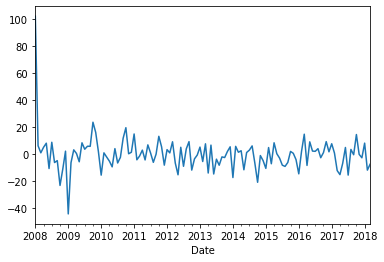

In [44]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

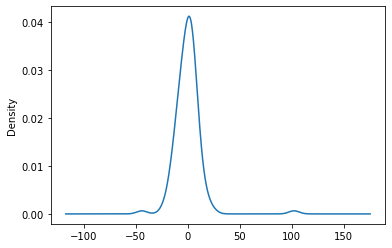

In [45]:
results.resid.plot(kind='kde')

In [46]:
df.shape

(123, 4)

<AxesSubplot:xlabel='Date'>

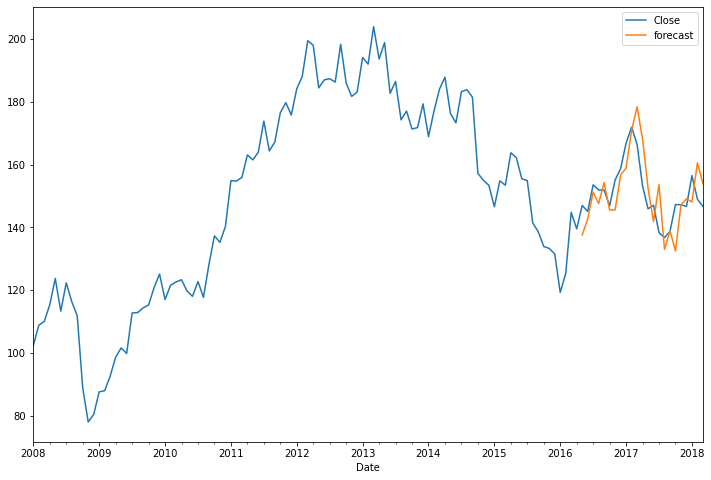

In [47]:
df['forecast'] = results.predict(start=100,end=123)
df[['Close','forecast']].plot(figsize=(12,8))

In [48]:
df.tail()

,Close,First Difference,Seasonal Difference,Seasonal First Difference,forecast
Date,,,,,
2017-11-01,147.198853,-0.086044,-7.887192,-8.240921,147.126821
2017-12-01,146.673035,-0.525818,-12.017212,-4.130020,149.132081
2018-01-01,156.500961,9.827927,-10.344162,1.673050,148.098059
2018-02-01,148.977051,-7.523911,-22.934998,-12.590836,160.570065
2018-03-01,146.682602,-2.294449,-19.799240,3.135757,153.889706


In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(1,24)]

In [51]:
future_dates

[Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00')]

In [52]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [53]:
future_df

,Close,First Difference,Seasonal Difference,Seasonal First Difference,forecast
2018-04-01,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN
2018-12-01,NaN,NaN,NaN,NaN,NaN
2019-01-01,NaN,NaN,NaN,NaN,NaN


In [54]:
final_df = pd.concat([df,future_df])

In [55]:
final_df.head()

,Close,First Difference,Seasonal Difference,Seasonal First Difference,forecast
2008-01-01,102.39962,NaN,NaN,NaN,NaN
2008-02-01,108.852776,6.453156,NaN,NaN,NaN
2008-03-01,110.076485,1.223709,NaN,NaN,NaN
2008-04-01,115.391968,5.315483,NaN,NaN,NaN
2008-05-01,123.738052,8.346085,NaN,NaN,NaN


In [56]:
final_df.tail()

,Close,First Difference,Seasonal Difference,Seasonal First Difference,forecast
2019-10-01,NaN,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN


In [57]:
final_df.shape

(146, 5)

In [58]:
final_df['forecast'] = results.predict(start=122,end=146)

In [59]:
final_df.tail()

,Close,First Difference,Seasonal Difference,Seasonal First Difference,forecast
2019-10-01,NaN,NaN,NaN,NaN,142.597573
2019-11-01,NaN,NaN,NaN,NaN,142.308995
2019-12-01,NaN,NaN,NaN,NaN,143.964754
2020-01-01,NaN,NaN,NaN,NaN,146.131690
2020-02-01,NaN,NaN,NaN,NaN,149.113162


<AxesSubplot:>

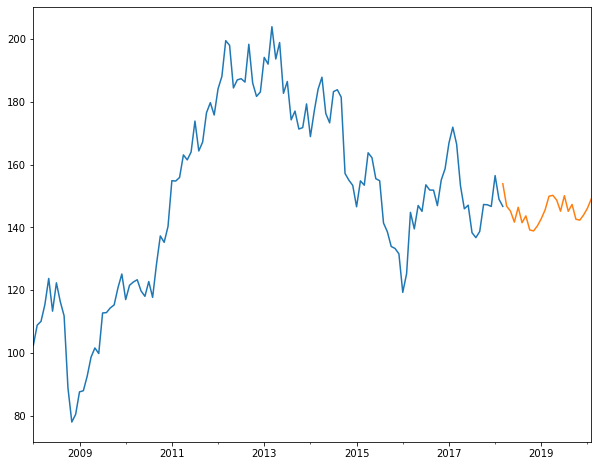

In [60]:
final_df['Close'].plot(figsize=(10,8))
final_df['forecast'].plot()

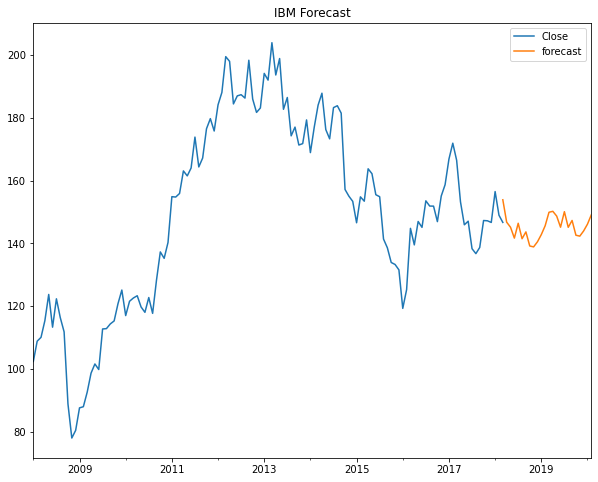

In [61]:
final_df[['Close','forecast']].plot(figsize=(10,8));
plt.title('IBM Forecast')
plt.savefig('future_forecast_IBM.png')

In [62]:
open_price = df['Close'][-1]
open_price

146.68260192871094

In [63]:
no_of_shares = 200000/open_price
no_of_shares

1363.4882213038586

In [64]:
final_price=final_df['forecast'][-1]
final_price

149.1131619408101

In [65]:
price_diff = final_price-open_price
price_diff

2.430560012099164

In [66]:
P_L = price_diff*no_of_shares
P_L

3314.039947669374